# Pymaceuticals Inc.
---

### Analysis

Observation 1:
The sample size was fairly accurate between male and female with 50.6% mice being male and 490.4% being females. This shows that there is less of a possibility of data beiing skewed.

Observation 2:
Capomulin was the drug that was most used in the experiements as it has the most rows in the data. That means that it was the drug that was used the most on mice.

Observation 3:
Finallly my last observation was that as tumor volume increased, the weight of the mice also increased as shown in the scatterplot. There was a strong positive correlation reflected in the data here. 

 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame


#combined_df = pd.concat([study_results, mouse_metadata], axis=0)
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")


# Display the data table for preview
combined_df.head().values.shape

(5, 8)

In [14]:
# Checking the number of mice.
#print(mouse_metadata.shape)
#mouse_metadata.head()
len(mouse_metadata)

249

In [15]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.groupby(['Mouse ID', 'Timepoint']).size().sort_values(ascending=False)
duplicate_mice

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [16]:
# Optional: Get all the data for the duplicate mouse ID. 
omit = combined_df["Mouse ID"] == "g989"
combined_df.loc[omit]

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
omit = combined_df["Mouse ID"] != "g989"
df2 = combined_df.loc[omit].reset_index(drop=True)
df2.shape

(1880, 8)

In [18]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_mean = df2.groupby(["Drug Regimen"]) ["Tumor Volume (mm3)"].mean()
tumor_median = df2.groupby(["Drug Regimen"]) ["Tumor Volume (mm3)"].median()
tumor_variance = df2.groupby(["Drug Regimen"])[ "Tumor Volume (mm3)"].var()
tumor_sem = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
tumor_std = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()

data = {
    "Tumor Average": tumor_mean,
    "Tumor Median": tumor_median,
    "Tumor Variance": tumor_variance,
    "Tumor Sem": tumor_sem,
    "Tumor Standard Deviation": tumor_std
}


leaderboard = pd.DataFrame(data).reset_index()
leaderboard
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


Drug Regimen  Tumor Average  Tumor Median  Tumor Variance  Tumor Sem  \
0    Capomulin      40.675741     41.557809       24.947764   0.329346   
1     Ceftamin      52.591172     51.776157       39.290177   0.469821   
2    Infubinol      52.884795     51.820584       43.128684   0.492236   
3     Ketapril      55.235638     53.698743       68.553577   0.603860   
4     Naftisol      54.331565     52.509285       66.173479   0.596466   
5      Placebo      54.033581     52.288934       61.168083   0.581331   
6     Propriva      52.320930     50.446266       43.852013   0.544332   
7     Ramicane      40.216745     40.673236       23.486704   0.320955   
8     Stelasyn      54.233149     52.431737       59.450562   0.573111   
9    Zoniferol      53.236507     51.818479       48.533355   0.516398   

   Tumor Standard Deviation  
0                  4.994774  
1                  6.268188  
2                  6.567243  
3                  8.279709  
4                  8.134708  
5                  7.821003  
6                  6.622085  
7                  4.846308  
8                  7.710419  
9                  6.966589

In [20]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

cols_agg = {
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
}
panel = df2.groupby(["Drug Regimen"]).agg(cols_agg).reset_index()
panel


Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

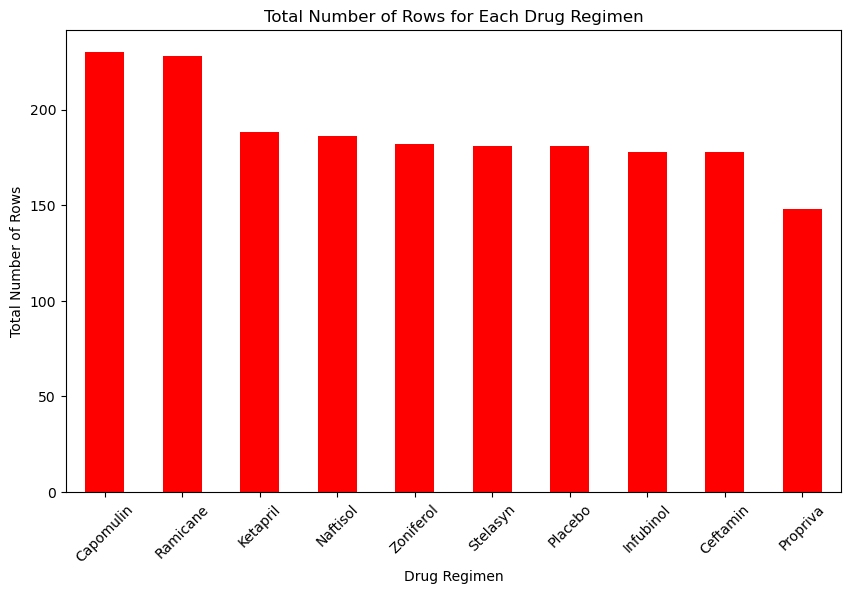

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
drug_regimen_counts = df2['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
ax = drug_regimen_counts.plot(kind='bar', color='red', figsize=(10, 6))
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Total Number of Rows')
ax.set_title('Total Number of Rows for Each Drug Regimen')
ax.tick_params(axis='x', rotation=45) 

plt.show()


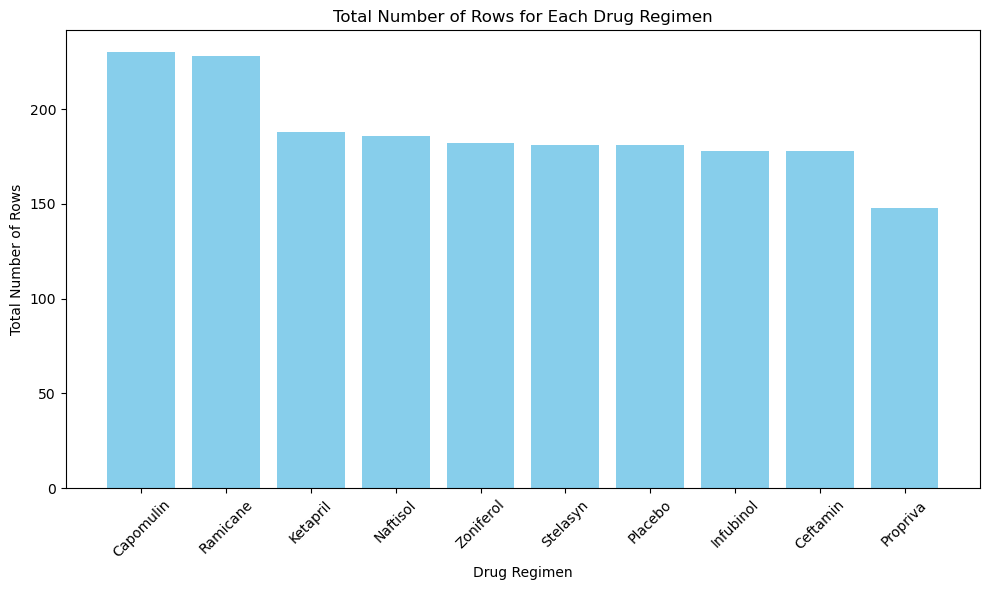

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = df2['Drug Regimen'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Display the plot
plt.show()

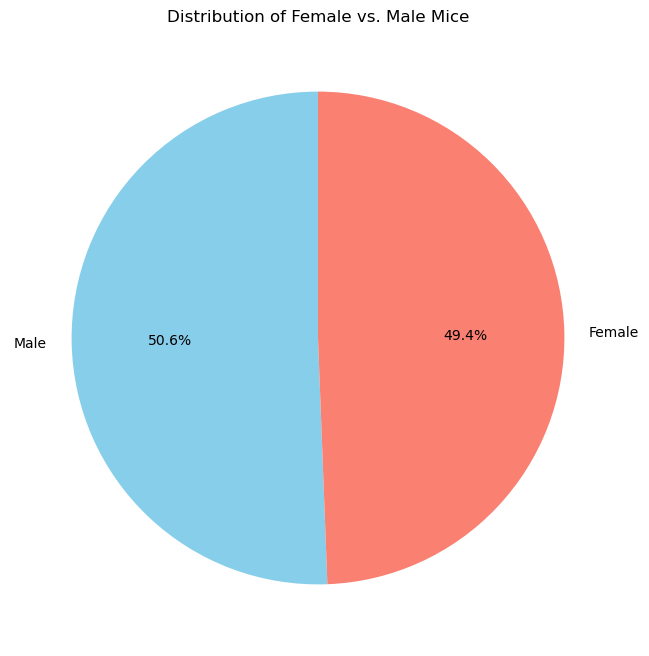

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = combined_df['Sex'].value_counts()

plt.figure(figsize=(8,8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('')  

# Display the plot
plt.show()

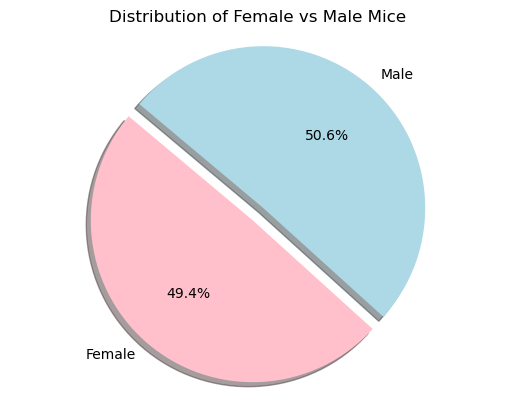

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = combined_df['Sex'].value_counts()


female_count = 49.4
male_count = 50.6
labels = ['Female', 'Male']
sizes = [female_count, male_count]
colors = ['pink', 'lightblue']
explode = (0.1, 0)  # Explode the first slice (Female)


plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title('Distribution of Female vs Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

df3 = df2.groupby("Mouse ID").Timepoint.max().reset_index()
new_col = df2.loc[:, ["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)", "Sex"]]

df3 = pd.merge(df3, new_col, on=["Mouse ID", "Timepoint"])


mask = df3["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
df3 = df3.loc[mask].reset_index(drop=True) 

df3



Mouse ID  Timepoint Drug Regimen  Tumor Volume (mm3)     Sex
0      a203         45    Infubinol           67.973419  Female
1      a251         45    Infubinol           65.525743  Female
2      a275         45     Ceftamin           62.999356  Female
3      a411         45     Ramicane           38.407618    Male
4      a444         45     Ramicane           43.047543  Female
..      ...        ...          ...                 ...     ...
95     y769         45     Ceftamin           68.594745  Female
96     y793         45    Capomulin           31.896238    Male
97     y865         45     Ceftamin           64.729837    Male
98     z578         45     Ramicane           30.638696    Male
99     z581         45    Infubinol           62.754451  Female

[100 rows x 5 columns]

In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = df3.loc[df3["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f'({drug} potential outliers: {outliers})')

(Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64)
(Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))


In [47]:
import seaborn as sns

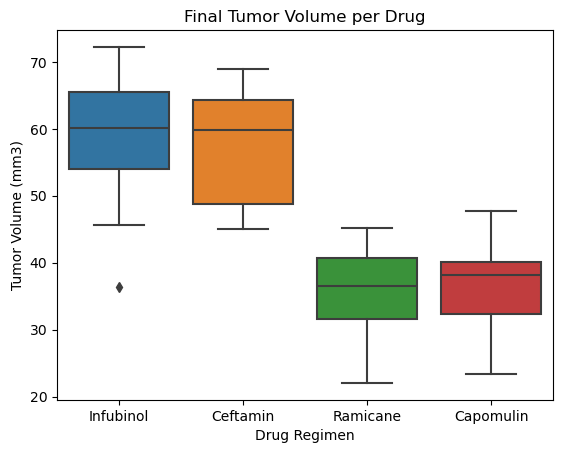

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
sns.boxplot(data=df3, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.title("Final Tumor Volume per Drug")
plt.show()

## Line and Scatter Plots

<Axes: xlabel='Timepoint'>

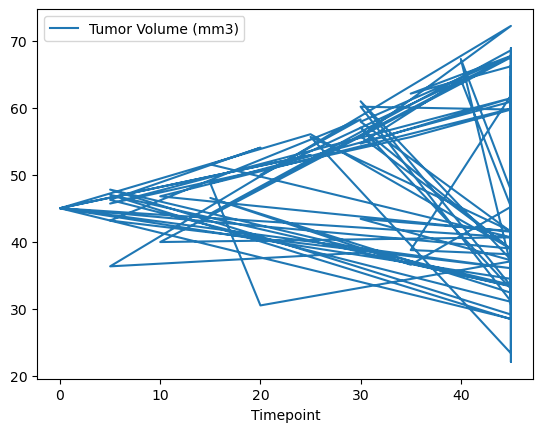

In [60]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df3.loc[df2['Drug Regimen'] == "Capomulin"]

mouse = 'j246'
data = df3.loc[df3["Mouse ID"] == mouse]


df3.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line')



<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

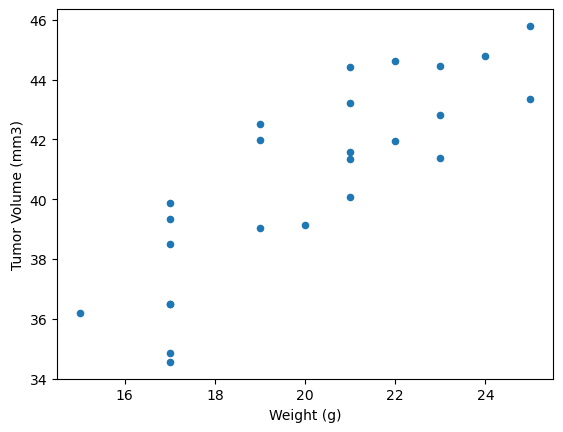

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data = df2.loc[df2["Drug Regimen"] == "Capomulin"]

df4 = data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()

df4.plot(x='Weight (g)', y='Tumor Volume (mm3)', kind='scatter')

## Correlation and Regression

In [49]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [50]:
 corrs = df4.corr(numeric_only = True)
corrs

Weight (g)  Tumor Volume (mm3)
Weight (g)            1.000000            0.841936
Tumor Volume (mm3)    0.841936            1.000000

y = 0.95x + 21.55
The r-squared is: 0.7088568047708723


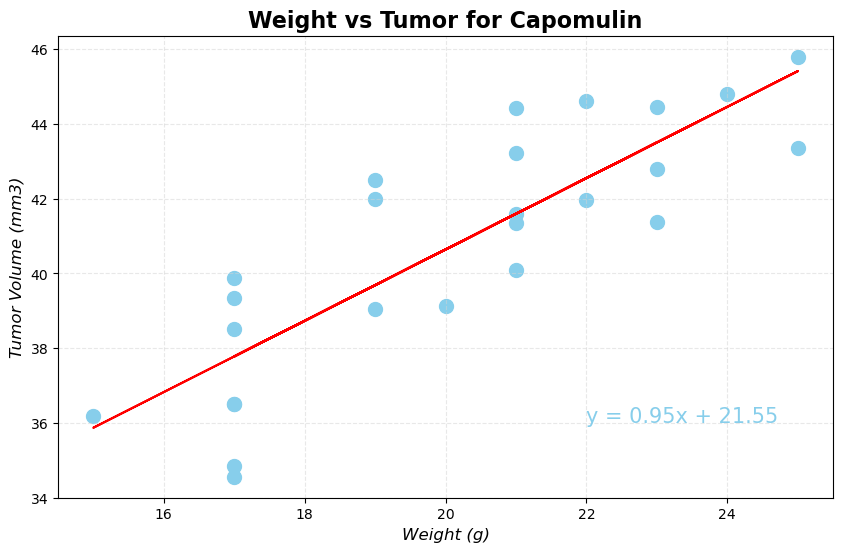

In [59]:
x_values = df4["Weight (g)"]
y_values = df4["Tumor Volume (mm3)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.figure(figsize=(10, 6))


plt.scatter(x_values, y_values, facecolor="skyblue", s=100)
plt.plot(x_values, regress_values, "r-") 

plt.xlabel("Weight (g)", fontsize=12, fontstyle="oblique")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Weight vs Tumor for Capomulin", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(22, 36),fontsize=15,color="skyblue")

print(f"The r-squared is: {rvalue**2}")
plt.show()